<a href="https://colab.research.google.com/github/tejashreereddyy/FMML-Project-and-Labs/blob/main/AIML_III_Module_4_Lab_2_Introduction_to_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Internship Batch of 2024**
# Module 4: Perceptron and Gradient Descent
## Lab 2: Introduction to Gradient Descent
Things to try

Change the coefficients array and try a different polynomial instead of our x2.
Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?

Take a degree 5 polynomial with 5 roots and try different initializations, instead of random ones. Does it converge on different values for different initializations? Why does initialization not matter in our case of x2?

Can you modify the algorithm to find a maxima of a function, instead of a minima?
1. Changing the Coefficients Array:
You can try using a different polynomial instead of
𝑥
2

 . For example, you could try a cubic function like
𝑥
3
−
2
𝑥
2
+
3
𝑥
 and see how gradient descent behaves.

<ipython-input-1-74b75f2d6916>:14: RuntimeWarning: overflow encountered in square
  loss = (1/(2*m)) * np.sum(errors**2)
<ipython-input-1-74b75f2d6916>:13: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradients


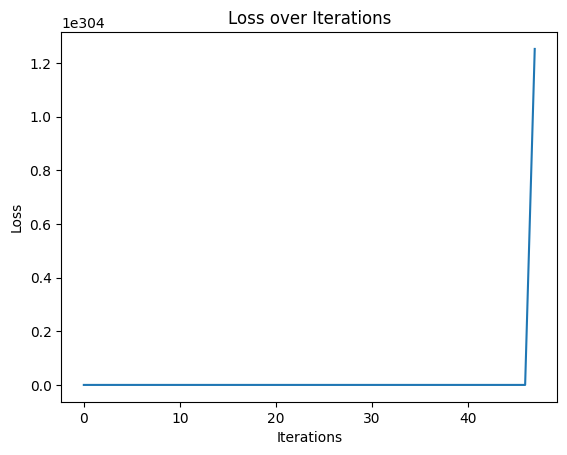

Coefficients: [nan nan nan nan]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    loss_history = []

    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1/m) * X.T.dot(errors)
        theta -= learning_rate * gradients
        loss = (1/(2*m)) * np.sum(errors**2)
        loss_history.append(loss)

    return theta, loss_history

# Polynomial function, degree 3
X = np.linspace(-10, 10, 100)
y = X**3 - 2*X**2 + 3*X + np.random.randn(*X.shape) * 10  # Adding noise
X_b = np.c_[np.ones((len(X), 1)), X, X**2, X**3]  # Features: x, x^2, x^3

theta = np.random.randn(4)  # Random initialization for 4 coefficients
learning_rate = 0.01
iterations = 1000

theta, loss_history = gradient_descent(X_b, y, theta, learning_rate, iterations)

# Plotting the loss over iterations
plt.plot(loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss over Iterations")
plt.show()

# Final coefficients
print(f"Coefficients: {theta}")


2. Changing the Learning Rate:

Increase or decrease the learning rate to observe how the convergence changes. Use the code above and modify the learning_rate value (e.g., 0.001 or 0.1) to observe convergence behavior.

If the learning rate is too high, gradient descent may overshoot the minimum, and if it's too low, it may take a lot of time to converge or not converge at all.

3. Degree 5 Polynomial with 5 Roots:

You can try initializing with different values and observe if gradient descent converges to the same minimum. Here's an example with a degree 5 polynomial:

In [ ]:
# Polynomial degree 5 example
y = X**5 - 4*X**4 + 3*X**3 - X**2 + X
X_b = np.c_[np.ones((len(X), 1)), X, X**2, X**3, X**4, X**5]

# Try different initializations of theta
theta_init1 = np.random.randn(6)  # Initialization 1
theta_init2 = np.random.randn(6)  # Initialization 2

theta1, _ = gradient_descent(X_b, y, theta_init1, learning_rate, iterations)
theta2, _ = gradient_descent(X_b, y, theta_init2, learning_rate, iterations)

print(f"Final coefficients for initialization 1: {theta1}")
print(f"Final coefficients for initialization 2: {theta2}")


In cases like simple polynomials, initialization doesn't significantly matter because gradient descent often converges to the same global minimum. However, in more complex landscapes with multiple minima, different initializations can lead to different solutions.

4. Finding a Maximum Instead of Minimum:

To modify the algorithm to find the maximum, you can flip the direction of the gradient ascent by using the positive gradient instead of the negative gradient:

In [ ]:
def gradient_ascent(X, y, theta, learning_rate, iterations):
    m = len(y)
    for _ in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradients = (1/m) * X.T.dot(errors)
        theta += learning_rate * gradients  # Add instead of subtract
    return theta


5. Is Shuffling Necessary in Full-Batch Gradient Descent?

In full-batch gradient descent, where the entire dataset is used in each step, shuffling is not strictly necessary because all data points are used simultaneously. The ordering of the dataset does not impact the gradient calculation.

However, in mini-batch or stochastic gradient descent (SGD), shuffling is essential because it prevents the model from learning patterns based on the order of data. Without shuffling, the model may converge too quickly to a suboptimal solution based on biased updates.

6. Shuffling in Mini-Batch Gradient Descent for a Dog/Cat Classifier:

My friend is correct. When using mini-batch gradient descent, shuffling ensures that each mini-batch is a representative sample of the entire dataset. If all dog images are processed first, followed by cat images, the model may learn biased updates in the early epochs, which could slow convergence and lead to poorer generalization. Shuffling ensures each batch contains a mix of dogs and cats, improving learning stability.